In [24]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [25]:
import matplotlib

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

p = 15
best_gradient = 0

In [26]:
image = cv.imread("blemish.png")
img_copy = image.copy()
print(f"Shape {img_copy.shape}")


Shape (333, 500, 3)


In [27]:
def findGradientMean(roi):
    print(f"roi {roi}")
    roi = img_copy[roi[0]:roi[1], roi[2]:roi[3]]
    sobelX = cv.Sobel(roi, cv.CV_32F, 1, 0, ksize=-1)
    sobelY = cv.Sobel(roi, cv.CV_32F, 0, 1, ksize=-1)
    return np.mean(np.sqrt((np.square(sobelX) + np.square(sobelY))))

def findNeigbhours(x,y):
    return [
        # Center Region
        (x - p, x + p, y - p, y + p),
        # Left Region
        (x - p - 2 * p - 1, x - p - 1, y - p, y + p),
        # Top Left Region
        (x - p - 2 * p - 1, x - p - 1, y + p + 1, y + p + 2 * p),
        # Top Region
        (x - p, x + p, y + p, y + p + 2 * p),
        # Top Right Region
        (x + p + 1, x + p + 2 * p + 1, y + p + 1, y + p + 2 * p),
        # Right Region
        (x + p + 1, x + p + 2 * p + 1, y - p, y + p),
        # Bottom Right Region
        (x + p + 1, x + p + 2 * p, y - p - 2 * p, y - p - 1),
        # Bottom Region
        (x - p, x + p, y - p - 2 * p, y - p - 1),
        # Bottom Left Region
        (x - p - 2 * p - 1, x - p - 1, y - p - 2 * p, y - p - 1),
    ]

In [28]:
x,y = 344,206

neigbhours = findNeigbhours(x,y)
print(neigbhours)

l, r, b, t = neigbhours[0]
best_roi = [l, r, b, t]
best_gradient = findGradientMean(best_roi)

for l, r, b, t in neigbhours[1:]:
    gradient = findGradientMean([l, r, b, t])
    print(gradient)
    if gradient < best_gradient:
        best_gradient = gradient
        best_roi = [l,r, b,t]
        print(f"best gradient is {gradient}")


print(best_roi)
mask = np.ones(img_copy[best_roi[0]:best_roi[1], best_roi[2]:best_roi[3]].shape, dtype=np.uint8)
mask = 255 * mask
fixedBlemish = cv.seamlessClone(
    img_copy[best_roi[0]:best_roi[1], best_roi[2]:best_roi[3]],
    img_copy,
    mask,
    (x, y),
    cv.NORMAL_CLONE
)

[(329, 359, 191, 221), (298, 328, 191, 221), (298, 328, 222, 251), (329, 359, 221, 251), (360, 390, 222, 251), (360, 390, 191, 221), (360, 389, 161, 190), (329, 359, 161, 190), (298, 328, 161, 190)]
roi [329, 359, 191, 221]
roi [298, 328, 191, 221]
138.9334
roi [298, 328, 222, 251]
72.2479
best gradient is 72.2479019165039
roi [329, 359, 221, 251]
93.808495
roi [360, 390, 222, 251]


error: OpenCV(4.4.0) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-9ugsgs06/opencv/modules/imgproc/src/deriv.cpp:419: error: (-215:Assertion failed) !_src.empty() in function 'Sobel'


size (333, 500, 3)


ValueError: zero-size array to reduction operation minimum which has no identity

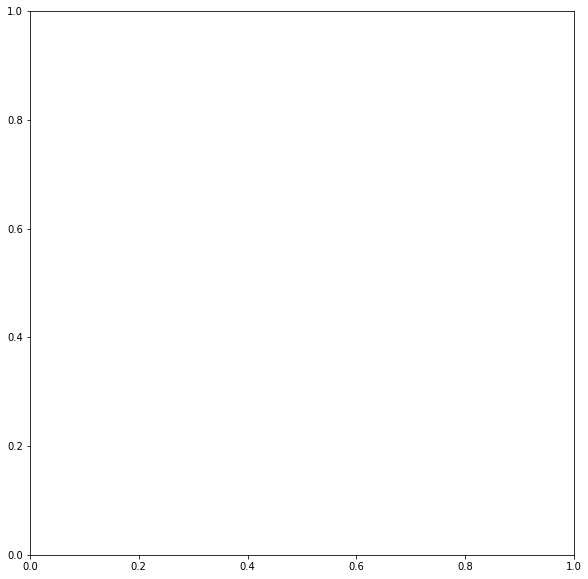

In [29]:
l, r, b, t = neigbhours[4]
print(f"size {img_copy.shape}")
#findGradientMean([l,r,b,t])
# plt.figure(figsize=(20, 20))
# plt.subplot(121)
plt.imshow(img_copy[l:r, b:t][...,::-1])
# plt.title("Original")
# plt.subplot(122)
# plt.imshow(fixedBlemish[l:r, b:t][...,::-1])
# plt.title("MedianBlur 5x5 Kernel")